# U.S. Medical Insurance Costs

## Goal: Predict the insurance cost given the data

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## 1. Load the Data

In [3]:
file = pd.read_csv("insurance.csv")

file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Explatory Data Analysis

### 2-1. Missing Values

In [84]:
file.apply(lambda col: sum(pd.isna(col)))

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64

There are no missing values across the data.

### 2-2. Target Variable

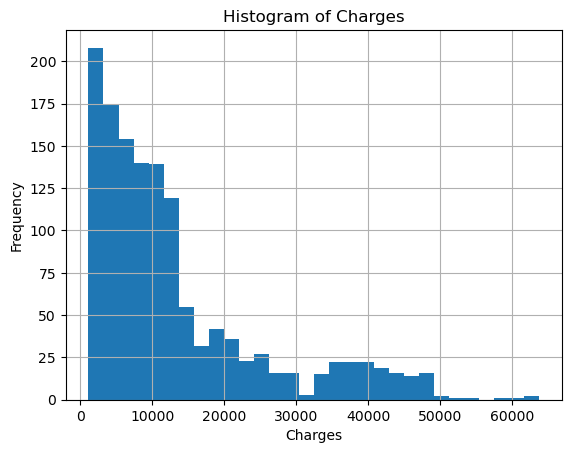

In [42]:
file['charges'].hist(bins = 30)
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

As histogram of the **charges** shows right skeweness, we can consider log transformation.

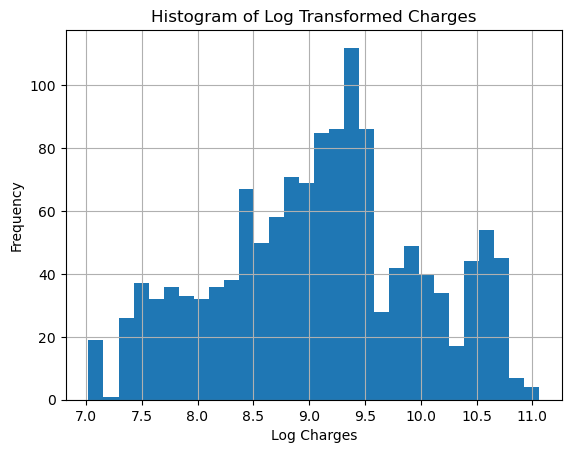

In [50]:
file['log_charges'] = np.log(file['charges'])

file['log_charges'].hist(bins = 30)
plt.title('Histogram of Log Transformed Charges')
plt.xlabel('Log Charges')
plt.ylabel('Frequency')
plt.show()

### 2-3. Predictors

In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* **insurance.csv** has 6 predictors **age, sex, bmi, children, smoker, region** and 1 target variable **charges**.
* **age, bmi, children** are numerical variables and **sex, smoker, region** are categorical variables.
* As **charges** variable is numerical, we have to use regression technique to predict the numerical variable.

#### 2-3-1. Numerical Variables

In [19]:
file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

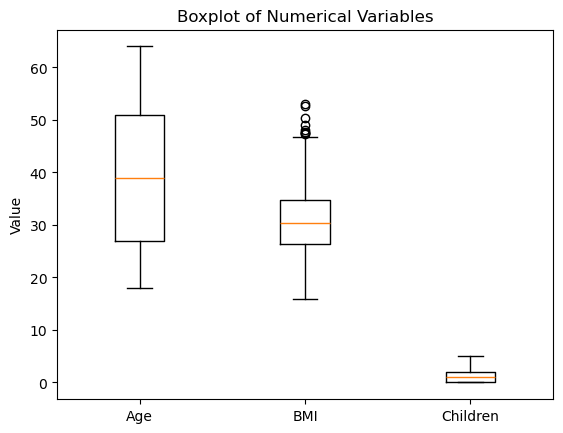

In [30]:
plt.boxplot(file[['age', 'bmi', 'children']], tick_labels = ['Age', 'BMI', 'Children'])
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Value')
plt.show

#### Scatterplot

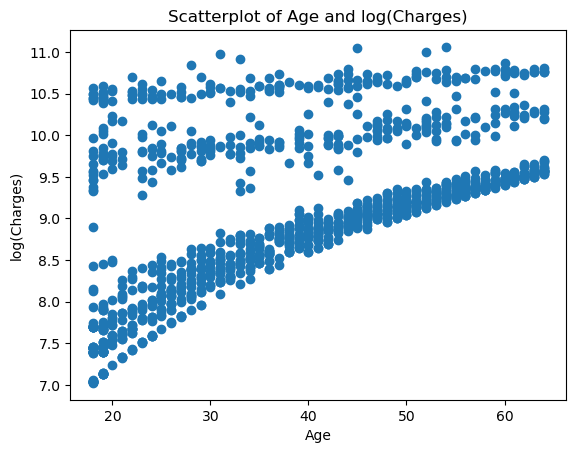

In [52]:
plt.scatter(file['age'], file['log_charges'])
plt.title('Scatterplot of Age and log(Charges)')
plt.xlabel('Age')
plt.ylabel('log(Charges)')
plt.show()

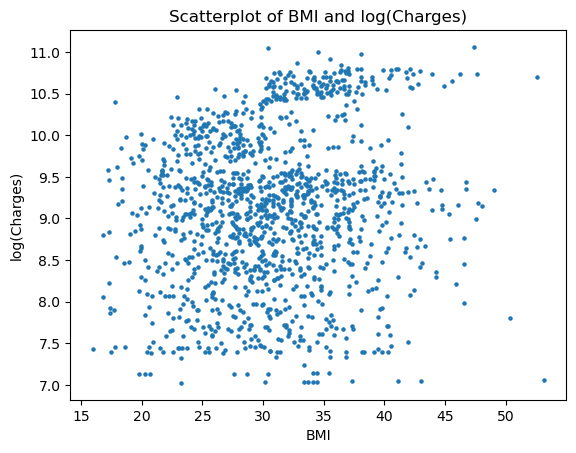

In [53]:
plt.scatter(file['bmi'], file['log_charges'], s=5)
plt.title('Scatterplot of BMI and log(Charges)')
plt.xlabel('BMI')
plt.ylabel('log(Charges)')
plt.show()

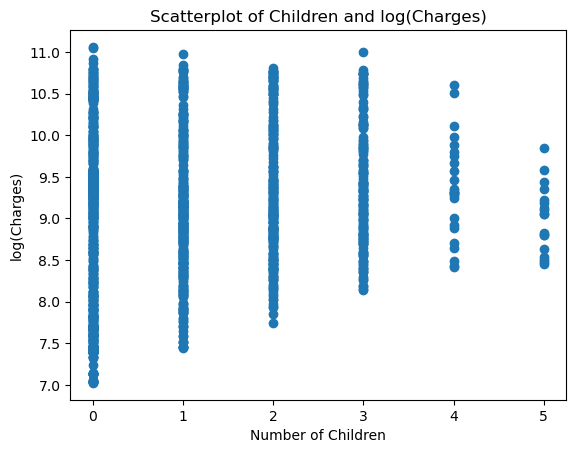

In [54]:
plt.scatter(file['children'], file['log_charges'])
plt.title('Scatterplot of Children and log(Charges)')
plt.xlabel('Number of Children')
plt.ylabel('log(Charges)')
plt.show()

#### 2-3-2. Categorical Variables

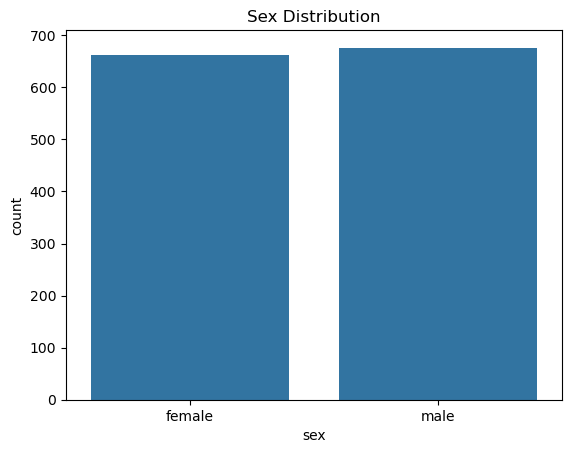

In [66]:
sns.countplot(x='sex', data=file)
plt.title('Sex Distribution')
plt.show()

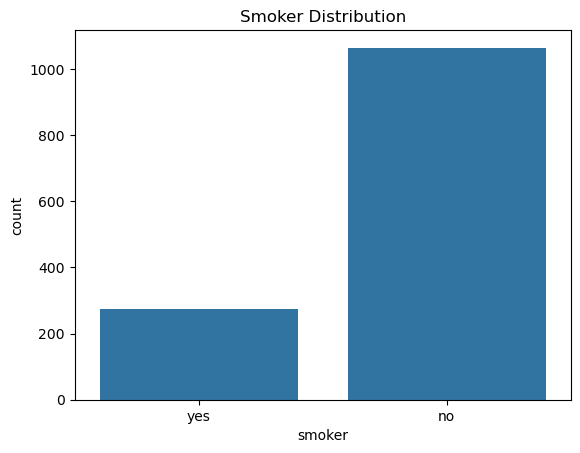

In [67]:
sns.countplot(x='smoker', data=file)
plt.title('Smoker Distribution')
plt.show()

As **smoker** variable shows the imbalanced data, we might consider usng the oversampling method to imporve the performance.

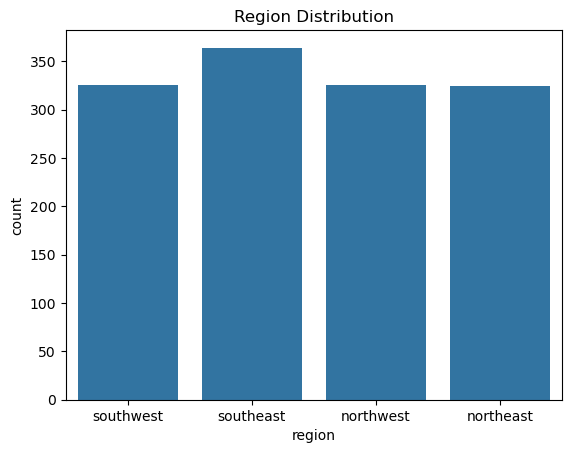

In [69]:
sns.countplot(x='region', data=file)
plt.title('Region Distribution')
plt.show()

## 3. Fit the Model

In [94]:
# Encode categorical variables to numbers
label_encoder = LabelEncoder()
file['label_sex'] = label_encoder.fit_transform(file['sex'])
file['label_smoker'] = label_encoder.fit_transform(file['smoker'])
file['label_region'] = label_encoder.fit_transform(file['region'])

# Create a variable to save x and y
x_label = file.iloc[:, 8:]
x = file.iloc[:, 0:6]
y = file.iloc[:, 6]
log_y = file.iloc[:, 7]

,label_sex,label_smoker,label_region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


### 3-1. Linear Regression

We will start with the simplist model, linear regression.

In [102]:
# Use original target variable 'charges'
model_linear = LinearRegression()
model_linear.fit(x_label, y)
score_linear = model_linear.score(x_label, y)

# Use log-transformed target variable 'log_charges'
model_linear_log = LinearRegression()
model_linear_log.fit(x_label, log_y)
score_linear_log = model_linear_log.score(x_label, log_y)

print(f"Linear Regression Model: {score_linear:.2%}\nLinear Regression Model(log): {score_linear_log:.2%}")

Linear Regression Model: 61.98%
Linear Regression Model(log): 44.66%


Linear regression model using original target data showed 61.98% of performance, and using log-transformed data showed 44.56%. We can can stick onto the original target data.

### 3-2. Tree Model

In [115]:
model_xgb = XGBRegressor().fit(x_label, y)
score_xgb = model_xgb.score(x_label, y)

print(f"XGBoost: {score_xgb:.2%}")

XGBoost: 63.01%


Using XGBoost, it showed little increased in performance.

### 3-3. Random Forest Model

In [147]:
model_rf = RandomForestRegressor(n_estimators=80, random_state=0)
model_rf.fit(x_label, y)
score_rf = model_rf.score(x_label, y)

print(f"Random Forest: {score_rf:.2%}")

Random Forest: 63.00%


### 3-4. KNN Model

In [146]:
for k in range(5, 23, 2):
    model_knn = KNeighborsRegressor(n_neighbors = k)
    model_knn.fit(x_label, y)
    score_knn = model_knn.score(x_label, y)
    
    print(f"KNN Regression (k = {k}): {score_knn:.2%}")

KNN Regression (k = 5): 54.82%
KNN Regression (k = 7): 58.37%
KNN Regression (k = 9): 60.58%
KNN Regression (k = 11): 61.36%
KNN Regression (k = 13): 62.15%
KNN Regression (k = 15): 62.19%
KNN Regression (k = 17): 62.18%
KNN Regression (k = 19): 62.35%
KNN Regression (k = 21): 62.43%


KNN didn't show the improve of the performance.